In [20]:
import pandas as pd

notas = pd.read_csv("../data/ratings.csv")

Para ler os 5 primeiros dados: 

In [35]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Para saber o formato da tabela:
vai retornar o total de linhas e o número de colunas que a tabela tem

In [25]:
notas.shape

(100836, 4)

Para redefinir o nome das colunas

In [27]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Devolver todos os valores da coluna 'nota'

In [31]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Uma coluna de um dataframe por padrão é uma 'Series'.
Devolver os valores únicos (exclusivos) do objeto 'Series'

In [32]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Verificar a frequência de cada nota

In [33]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

Verificar a média de todas as notas 

In [36]:
notas['nota'].mean()

3.501556983616962

Visualizando os dados

In [37]:
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [41]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

Plotando uma série de dados do dataframe em um histograma

<AxesSubplot:ylabel='Frequency'>

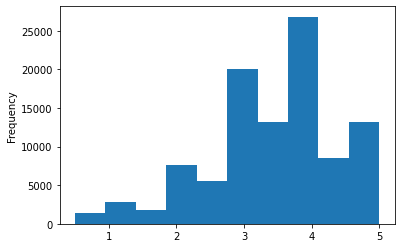

In [43]:
notas.nota.plot(kind='hist')

In [ ]:
A visualização de gráficos é muito importante para entendermos o que está acontecendo com os dados. 

In [ ]:
Procurando a mediana (quem divide os dados em duas partes, a mediana é a parte central do gráfico).

In [47]:
print(f"Mediana: {notas.nota.median()}")

Mediana: 3.5


Medidas de descrição dos dados

In [48]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Visualização de dados estáticos, com interface gráfica de alto nível

In [49]:
import seaborn as sns

Boxplot é uma forma de visualizar os dados, de acordo com a distruibuição dos dados.

D:\projetos\alura\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

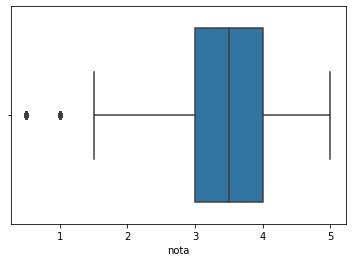

In [50]:
sns.boxplot(notas.nota)